In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
import tensorflow as tf
from keras.layers.merge import concatenate

In [2]:
#fix random seed-1 (or whatever other integer) for reproductibility
seed = 7
np.random.seed(seed)

In [3]:
#Generate data
N = 1000
X_train1 = np.linspace(0.0,1.0,N)
X_train2 = X_train1*X_train1
y_train1 = np.sin(2*np.pi*X_train1)
y_train2 = np.exp(X_train1)

X_val1 = np.random.rand(100)
X_val1 = np.sort(X_val1)
X_val2 = X_val1*X_val1
y_val1 = np.sin(2*np.pi*X_val1)
y_val2 = np.exp(X_val1)

In [4]:
#Define model
x0_left = Input(shape = (1,))
x0_right = Input(shape = (1,))

x1_left = Dense(20,input_dim = 1, activation = 'sigmoid')(x0_left)
x1_right = Dense(20,input_dim = 1, activation = 'sigmoid')(x0_right)

x2_left = Dense(20, activation = 'sigmoid')(x1_left)
x2_right = Dense(20, activation = 'sigmoid')(x1_right)

x3 = concatenate([x2_left,x2_right])

x4 = Dense(20, activation = 'sigmoid')(x3)
x5 = Dense(20, activation = 'sigmoid')(x4)

x6_left = Dense(20, activation = 'sigmoid')(x5)
x6_right = Dense(20, activation = 'sigmoid')(x5)

x7_left = Dense(20, activation = 'sigmoid')(x6_left)
x7_right = Dense(20, activation = 'sigmoid')(x6_right)

x8_left = Dense(1)(x7_left)
x8_right = Dense(1)(x7_right)
                                                                                
model = Model(inputs = [x0_left,x0_right], outputs = [x8_left,x8_right])

model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 20)           40          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 20)           40          input_2[0][0]                    
______________________________________________________________________________________________

In [5]:
model.compile(optimizer = 'rmsprop', loss = ['mse','mse'], loss_weights = [1,1],metrics = 'mse')
hist = model.fit([X_train1,X_train2],[y_train1,y_train2],epochs = 300, batch_size = 32, verbose = 0,
                 validation_data = ([X_val1,X_val2],[y_val1,y_val2]))

In [6]:
[yp_sin,yp_exp] = model.predict([X_val1,X_val2])

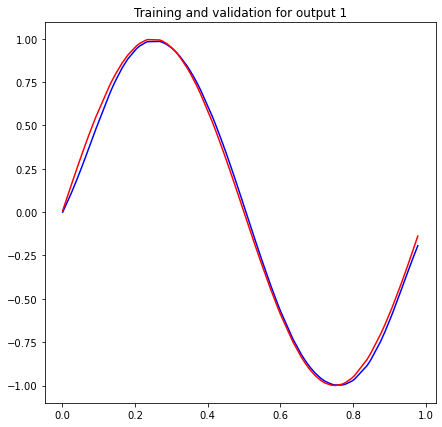

In [7]:
plt.figure(figsize = (7,7))
plt.plot(X_val1,yp_sin,'b')
plt.plot(X_val1,y_val1,'r')
plt.title('Training and validation for output 1')
plt.show()

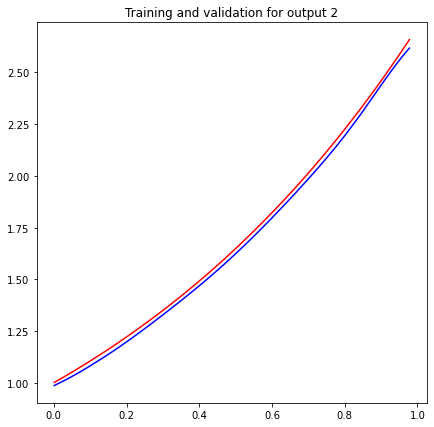

In [8]:
plt.figure(figsize = (7,7))
plt.plot(X_val1,yp_exp,'b')
plt.plot(X_val1,y_val2,'r')
plt.title('Training and validation for output 2')
plt.show()

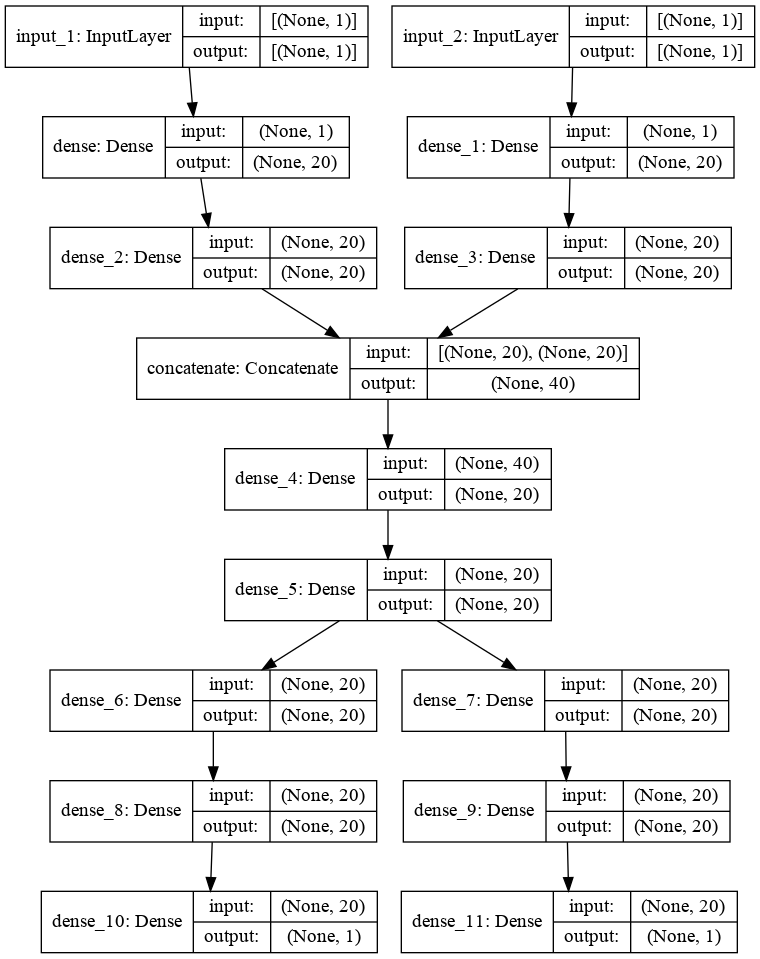

In [9]:
tf.keras.utils.plot_model(model,show_shapes = True)